In [1]:
from bs4 import BeautifulSoup
import urllib.request as request
import itertools
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
abe_html = request.urlopen("http://abehiroshi.la.coocan.jp/")
abe_soup = BeautifulSoup(abe_html, "html.parser")

In [3]:
abe_tags = [tag.name for tag in abe_soup.find_all()]

In [4]:
frames_srcs = [f["src"] for f in abe_soup.find_all("frame")]

In [5]:
soups = [BeautifulSoup(request.urlopen("http://abehiroshi.la.coocan.jp/" + src), "html.parser") for src in frames_srcs]
frame_tags = []
for s in soups:
    tags = [tag.name for tag in s.find_all()]
    frame_tags.append(tags)
flattern_tags = list(itertools.chain.from_iterable(frame_tags))

In [6]:
tags = list(itertools.chain(abe_tags, flattern_tags))

In [7]:
abe_df = pd.DataFrame.from_records([[tag] for tag in tags], columns=["tag"])

In [8]:
tag_counts = abe_df.groupby("tag").size().sort_values()

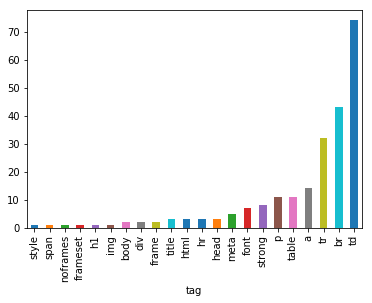

In [9]:
tag_counts.plot.bar()

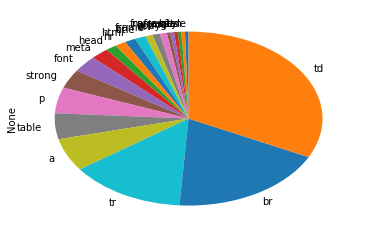

In [10]:
tag_counts.plot.pie(startangle=90)